<a href="https://colab.research.google.com/github/a33211/Data-science-homeworks/blob/main/Working_copy_Homework_9_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import utils

Так як це теж зображення, скопіював для початку частину налаштувань з ДЗ8

In [28]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
#class names
class_names = ['майка', 'штані', 'світер', 'плаття', 'толстовка', 'сандалі', 'сорочка', 'кросівки', 'сумка', 'жіночі краги']

In [29]:
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

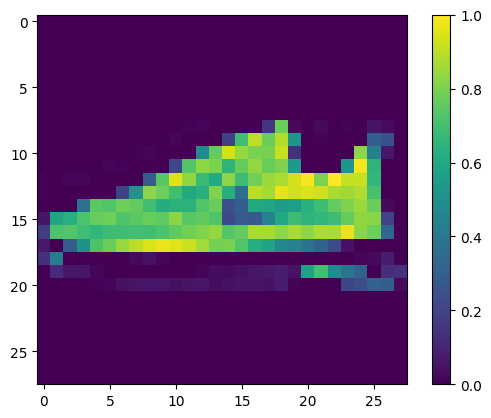

In [30]:
plt.figure()
plt.imshow(x_train[690])
plt.colorbar()
plt.grid(False)

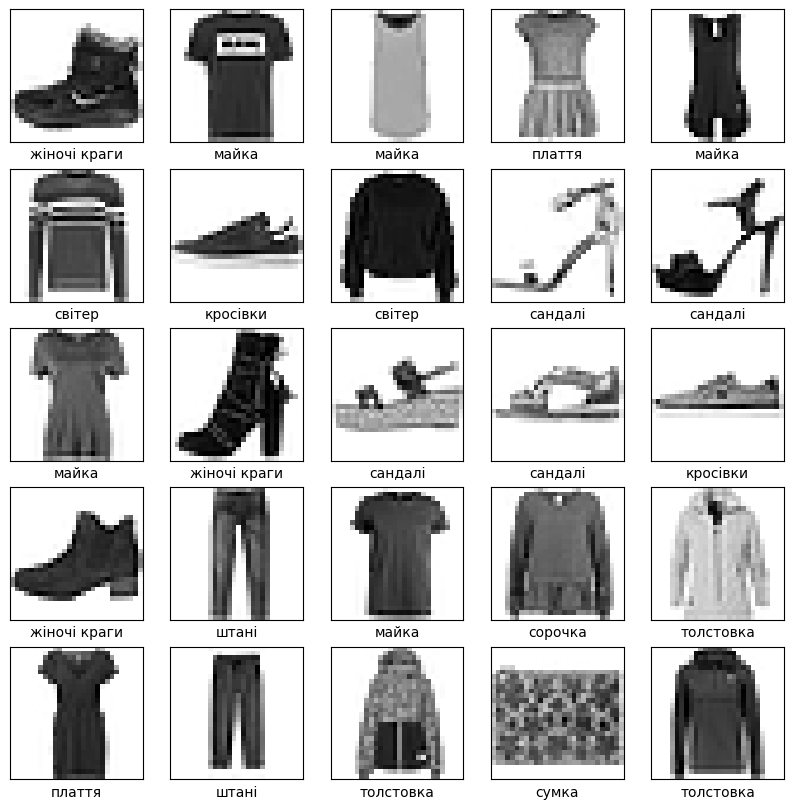

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

Побудова модоелі

In [31]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          layers.Dense(512, activation="relu"),
                          layers.Dense(256, activation="relu"),
                          layers.Dense(128, activation="relu"),
                          layers.Dense(10, activation="softmax")
])
#протестувати з активатором Адам

In [32]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
display(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


None

Треннування моделі

In [33]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 22s 11ms/step - loss: 0.4764 - accuracy: 0.8261
Epoch 2/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3629 - accuracy: 0.8667
Epoch 3/100
1875/1875 [==============================] - 22s 11ms/step - loss: 0.3283 - accuracy: 0.8784
Epoch 4/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3039 - accuracy: 0.8868
Epoch 5/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2850 - accuracy: 0.8938
Epoch 6/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2698 - accuracy: 0.8985
Epoch 7/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2582 - accuracy: 0.9022
Epoch 8/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2483 - accuracy: 0.9054
Epoch 9/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2360 - accuracy: 0.9105
Epoch 10/100
1875/1875 [==============================]

In [34]:
#тестування
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.1279 - accuracy: 0.8957
Test accuracy: 0.8956999778747559


In [ ]:
#прогноз
predict=model.predict(x_train)

1875/1875 [==============================] - 7s 4ms/step


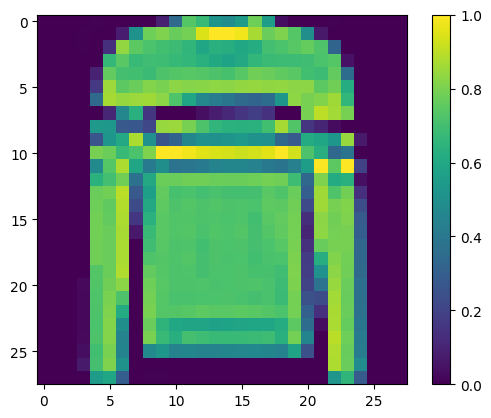

In [ ]:
class_names[np.argmax(predict[5])]
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)